<a href="https://colab.research.google.com/github/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/Cherukupally_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [3]:
#Getting the abstracts using semantic scholar API
import pandas as pd
import warnings
from semanticscholar import SemanticScholar


# Ignoring warnings
warnings.filterwarnings("ignore")
pd.set_option('display.width', None)

# Initialization the API
sem_schr = SemanticScholar()

# Search articles with "machine Learning"
res = sem_schr.search_paper('machine learning', fields=['title', 'abstract'])

# Create dataframe
df_paper = pd.DataFrame(columns=['paperId', 'title', 'abstract'])

# Add to dataframe
count = 0
for i in res:
    if i.abstract:  # Check if the abstract is present
        count += 1
        paper_info = {
            'paperId': i.paperId,
            'title': i.title,
            'abstract': i.abstract
        }
        df_paper = df_paper.append(paper_info, ignore_index=True)

    if count == 100:
        break

# Print
print(df_paper)

                                     paperId                                              title  \
0   f9c602cc436a9ea2f9e7db48c77d924e09ce3c32  Fashion-MNIST: a Novel Image Dataset for Bench...   
1   46200b99c40e8586c8a0f588488ab6414119fb28  TensorFlow: A system for large-scale machine l...   
2   9c9d7247f8c51ec5a02b0d911d1d7b9e8160495d  TensorFlow: Large-Scale Machine Learning on He...   
3   f9c990b1b5724e50e5632b94fdb7484ece8a6ce7  Convolutional LSTM Network: A Machine Learning...   
4   9f5b82d9915d0752957602224c5056be7e749c83                    Foundations of Machine Learning   
..                                       ...                                                ...   
95  175e37bca3762b3a52c6a0e153060b98a251d061  Inverse molecular design using machine learnin...   
96  88a97c8ef539589c55a6fe869c243792e470d6a3  Applied Machine Learning at Facebook: A Datace...   
97  fbf9812f29156024ec693b4633a21303eead309d  Machine learning algorithm validation with a l...   
98  1b0f4b

In [4]:
#Cleaning the Abstracts

#pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import pandas as pd
nltk.download('stopwords')
nltk.download('wordnet')

# Function for preprocessing data
def preprocess_abstract_data(abstract):
    # Removing punctuation
    abstract = abstract.str.replace('[^\w\s]', '')

    # Removing stopwords
    stop = stopwords.words('english')
    abstract = abstract.apply(lambda x: " ".join(x for x in x.split() if x not in stop))

    # Remove numbers
    abstract = abstract.apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

    # Convert to lowercase
    abstract = abstract.apply(lambda x: " ".join(x.lower() for x in x.split()))

    # Stemming
    st = PorterStemmer()
    abstract = abstract.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

    # Lemmatization
    abstract = abstract.apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

    return abstract

df_paper = df_paper.dropna(subset=['abstract'])

# Apply the preprocessing function
df_paper['Cleaned_abstract'] = preprocess_abstract_data(df_paper['abstract'])

# Display the DataFrame with the cleaned text
print(df_paper)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                     paperId                                              title  \
0   f9c602cc436a9ea2f9e7db48c77d924e09ce3c32  Fashion-MNIST: a Novel Image Dataset for Bench...   
1   46200b99c40e8586c8a0f588488ab6414119fb28  TensorFlow: A system for large-scale machine l...   
2   9c9d7247f8c51ec5a02b0d911d1d7b9e8160495d  TensorFlow: Large-Scale Machine Learning on He...   
3   f9c990b1b5724e50e5632b94fdb7484ece8a6ce7  Convolutional LSTM Network: A Machine Learning...   
4   9f5b82d9915d0752957602224c5056be7e749c83                    Foundations of Machine Learning   
..                                       ...                                                ...   
95  175e37bca3762b3a52c6a0e153060b98a251d061  Inverse molecular design using machine learnin...   
96  88a97c8ef539589c55a6fe869c243792e470d6a3  Applied Machine Learning at Facebook: A Datace...   
97  fbf9812f29156024ec693b4633a21303eead309d  Machine learning algorithm validation with a l...   
98  1b0f4b

In [2]:
pip install semanticscholar

In [30]:
# Question-1: (1) Count the frequency of all the N-grams (N=3).

import nltk
from nltk import ngrams
from nltk.probability import FreqDist
import pandas as pd
nltk.download('punkt')

#function to get ngrams
def get_ngrams(text, n):
    tokens = nltk.word_tokenize(text.lower())
    n_grams = ngrams(tokens, n)
    return list(n_grams)

#Calculating trigrams
all_tri_grams = [ngram for review in df_paper['Cleaned_abstract'] for ngram in get_ngrams(review, 3)]
freq_dist_tri = FreqDist(all_tri_grams)
print("Frequency of N-grams (N=3):")
print(freq_dist_tri.most_common())



Frequency of N-grams (N=3):
[(('machin', 'learn', 'model'), 17), (('machin', 'learn', 'ml'), 15), (('machin', 'learn', 'algorithm'), 13), (('deep', 'neural', 'network'), 11), (('use', 'machin', 'learn'), 10), (('machin', 'learn', 'system'), 9), (('interpret', 'machin', 'learn'), 9), (('machin', 'learn', 'techniqu'), 8), (('machin', 'learn', 'method'), 8), (('machin', 'learn', 'research'), 6), (('support', 'vector', 'machin'), 6), (('thi', 'paper', 'describ'), 5), (('problem', 'machin', 'learn'), 5), (('neural', 'network', 'train'), 5), (('neural', 'network', 'model'), 4), (('deploy', 'machin', 'learn'), 4), (('dml', 'appli', 'learn'), 4), (('averag', 'treatment', 'effect'), 4), (('supervis', 'machin', 'learn'), 4), (('applic', 'machin', 'learn'), 4), (('logist', 'regress', 'neural'), 4), (('regress', 'neural', 'network'), 4), (('artifici', 'neural', 'network'), 4), (('analysi', 'machin', 'learn'), 3), (('machin', 'learn', 'provid'), 3), (('field', 'machin', 'learn'), 3), (('artifici', 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [31]:
#Question-1:(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

#Calculating bigrams
all_bi_grams = [ngram for review in df_paper['Cleaned_abstract'] for ngram in get_ngrams(review, 2)]
freq_dist_bi = FreqDist(all_bi_grams)
print("Frequency of N-grams (N=2):")
print(freq_dist_bi.most_common())

#Calculating unigrams
all_uni_grams = [ngram for review in df_paper['Cleaned_abstract'] for ngram in get_ngrams(review, 1)]
freq_dist_uni = FreqDist(all_uni_grams)
print("Frequency of N-grams (N=1):")
print(freq_dist_uni.most_common())

def probability_of_bigram():
  for bigram_val in freq_dist_bi:
#    print(bigram_values)
    print(("bigram values", bigram_val,"Probability :",freq_dist_bi[bigram_val]/freq_dist_uni[(bigram_val[0],)]))

probability_of_bigram()

Streaming output truncated to the last 5000 lines.
('bigram values', ('mechan', 'rapidli'), 'Probability :', 0.08333333333333333)
('bigram values', ('rapidli', 'advanc'), 'Probability :', 0.2)
('bigram values', ('advanc', 'driven'), 'Probability :', 0.06666666666666667)
('bigram values', ('driven', 'unpreced'), 'Probability :', 0.5)
('bigram values', ('unpreced', 'volum'), 'Probability :', 1.0)
('bigram values', ('volum', 'data'), 'Probability :', 1.0)
('bigram values', ('data', 'experi'), 'Probability :', 0.007142857142857143)
('bigram values', ('experi', 'field'), 'Probability :', 0.03333333333333333)
('bigram values', ('field', 'measur'), 'Probability :', 0.03333333333333333)
('bigram values', ('measur', 'largescal'), 'Probability :', 0.08333333333333333)
('bigram values', ('largescal', 'simul'), 'Probability :', 0.1111111111111111)
('bigram values', ('simul', 'multipl'), 'Probability :', 0.07142857142857142)
('bigram values', ('multipl', 'spatiotempor'), 'Probability :', 0.11111111

In [32]:
#Question-1:(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

from textblob import TextBlob

cleaned_abstracts = df_paper['Cleaned_abstract']

# Create a TextBlob
t_blobs = cleaned_abstracts.apply(lambda x: TextBlob(str(x)))

# Get noun phrases for each TextBlob object
abstract_noun_phrases = t_blobs.apply(lambda x: x.noun_phrases)

# Print
print(abstract_noun_phrases)




0     [present fashionmnist, new dataset compris, gr...
1     [tensorflow machin, system oper larg scale het...
2     [tensorflow interfac express machin, execut al...
3     [goal precipit nowcast, futur rainfal intens, ...
4     [machin learningprobabilist machin learninghan...
                            ...                        
95    [new materi, enorm societ technolog progress, ...
96    [core mani essenti product servic facebook thi...
97    [advanc neuroimag genom motion track eyetrack ...
98    [potenti provid stakehold insight model behavi...
99    [emerg vulner demand, new convers, public acad...
Name: Cleaned_abstract, Length: 100, dtype: object


In [34]:
from textblob import TextBlob
import pandas as pd
import nltk
nltk.download('brown')

cleaned_abstracts = df_paper['Cleaned_abstract']

# Extract noun phrases
abtstract_noun_phrases_all = []
for abstract in cleaned_abstracts:
    blob = TextBlob(str(abstract))
    abtstract_noun_phrases_all.extend(blob.noun_phrases)

#Calculate the frequency for noun phrase
abstract_freq_dist_all = nltk.FreqDist(abtstract_noun_phrases_all)

max_frequency = abstract_freq_dist_all[abstract_freq_dist_all.max()]
print("Maximum Frequency:", max_frequency)

# Calculate relative frequencies
table_data = {}
for i, abstract in enumerate(cleaned_abstracts):
    blob = TextBlob(str(abstract))
    noun_phrases_per_abstract = blob.noun_phrases
    frequencies = {
        noun_phrase: abstract_freq_dist_all[noun_phrase] / max_frequency  # Relative frequency
        for noun_phrase in abtstract_noun_phrases_all
    }
    table_data[f'Abstract {i + 1}'] = frequencies

# Convert to DataFrame
df = pd.DataFrame(table_data).transpose()

# Print
print(df)




[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


Maximum Frequency: 3
              present fashionmnist  new dataset compris  \
Abstract 1                0.333333             0.333333   
Abstract 2                0.333333             0.333333   
Abstract 3                0.333333             0.333333   
Abstract 4                0.333333             0.333333   
Abstract 5                0.333333             0.333333   
...                            ...                  ...   
Abstract 96               0.333333             0.333333   
Abstract 97               0.333333             0.333333   
Abstract 98               0.333333             0.333333   
Abstract 99               0.333333             0.333333   
Abstract 100              0.333333             0.333333   

              grayscal imag fashion product categori imag  imag test  imag fashionmnist  \
Abstract 1                                       0.333333   0.333333           0.333333   
Abstract 2                                       0.333333   0.333333           0.333333 

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [36]:
#Question-2 (1) To build the documents-terms weights (tf*idf) matrix bold text.

#Calculating tf
abstract_tf_res = (df_paper['Cleaned_abstract']).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
abstract_tf_res.columns = ['Cleaned_abstract_words','tf']
print(abstract_tf_res)

import numpy as np
#calculating tf*idf
for i,j in enumerate(abstract_tf_res['Cleaned_abstract_words']):
  abstract_tf_res.loc[i, 'idf'] = np.log(df_paper.shape[0]/(len(df_paper[df_paper['Cleaned_abstract'].str.contains(j)])))
abstract_tf_res['tf*idf'] = abstract_tf_res['tf'] * abstract_tf_res['idf']
print(abstract_tf_res)

#tf-idf matrix using vectorizer
corpus = df_paper['Cleaned_abstract']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
print(tfidf_matrix)

     Cleaned_abstract_words    tf
0                      imag  19.0
1                   dataset  37.0
2                  categori  10.0
3                       the  73.0
4              fashionmnist   2.0
...                     ...   ...
2174          otherwisereli   1.0
2175                subvert   1.0
2176             manifestli   1.0
2177                  arriv   1.0
2178                  alter   1.0

[2179 rows x 2 columns]
     Cleaned_abstract_words    tf       idf     tf*idf
0                      imag  19.0  1.966113  37.356144
1                   dataset  37.0  1.660731  61.447055
2                  categori  10.0  2.659260  26.592600
3                       the  73.0  0.261365  19.079628
4              fashionmnist   2.0  4.605170   9.210340
...                     ...   ...       ...        ...
2174          otherwisereli   1.0  4.605170   4.605170
2175                subvert   1.0  4.605170   4.605170
2176             manifestli   1.0  4.605170   4.605170
2177             

In [37]:
#Question-2:(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


#Building the documents-terms weights (tf*idf) matrix
corpus = df_paper['Cleaned_abstract']
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)

#Query
query = "best machine learning model"

# Transform the query using vectorizer
query_vec = vectorizer.transform([query])

#Calculate cosine similarity
cosine_sim = cosine_similarity(query_vec, tfidf_matrix).flatten()

#Rank the documents based on cosine similarity
df_paper['cosine_similarity'] = cosine_sim
ranked_doc= df_paper.sort_values(by='cosine_similarity', ascending=False)

# Print ranked documents
print("Ranked Documents:")
print(ranked_doc[['Cleaned_abstract','cosine_similarity']])




Ranked Documents:
                                     Cleaned_abstract  cosine_similarity
62  in issu best web present modifi nation institu...           0.174756
83  machin learn ml model may deem confidenti due ...           0.136962
28  adversari exampl malici input design fool mach...           0.119987
93  mani machin learn model vulner adversari examp...           0.119603
82  machin learn wide use produc model rang applic...           0.113034
..                                                ...                ...
57  machin learn emerg big data technolog highperf...           0.000000
63  in recent year use machin learn ml comput chem...           0.000000
68  one challeng machin learn research ensur prese...           0.000000
70  allopt deep learn deep learn use multilay arti...           0.000000
99  emerg vulner demand new convers with public ac...           0.000000

[100 rows x 2 columns]


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [39]:
#Question-3 (1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Download NLTK data
nltk.download('punkt')

# Tokenize the text
data_tokenized = [word_tokenize(sentence.lower()) for abstract in df_paper['Cleaned_abstract'] for sentence in nltk.sent_tokenize(abstract)]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=data_tokenized, vector_size=300, window=5, min_count=1, workers=4)
print(w2v_model)

#Print words
words = list(w2v_model.wv.index_to_key)
print(words)

# save model
w2v_model.save('model.bin')

# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

# Fetching all keys
keys = list(model.wv.index_to_key)

# Retrieving vectors associated with the keys
X = [model.wv[key] for key in keys]

#Converting to 2 dimenesional
pca = PCA(n_components=2)
result = pca.fit_transform(X)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Word2Vec<vocab=2180, vector_size=300, alpha=0.025>
['learn', 'machin', 'model', 'data', 'use', 'method', 'we', 'train', 'the', 'algorithm', 'research', 'network', 'system', 'provid', 'in', 'ml', 'neural', 'thi', 'perform', 'applic', 'comput', 'problem', 'approach', 'featur', 'predict', 'attack', 'includ', 'interpret', 'techniqu', 'show', 'paper', 'discus', 'dataset', 'deep', 'develop', 'classif', 'challeng', 'set', 'work', 'practic', 'adversari', 'privaci', 'gener', 'exampl', 'recent', 'implement', 'evalu', 'mani', 'field', 'present', 'new', 'experi', 'process', 'result', 'framework', 'differ', 'propos', 'base', 'design', 'decis', 'review', 'estim', 'understand', 'our', 'also', 'well', 'make', 'accuraci', 'appli', 'domain', 'artifici', 'graph', 'a', 'regress', 'direct', 'inform', 'howev', 'quantum', 'studi', 'avail', 'test', 'optim', 'input', 'intellig', 'distribut', 'requir', 'describ', 'task', 'improv', 'futur', 'explain', 'imag', 'introduc', 'import', 'allow', 'larg', 'class', 'exis

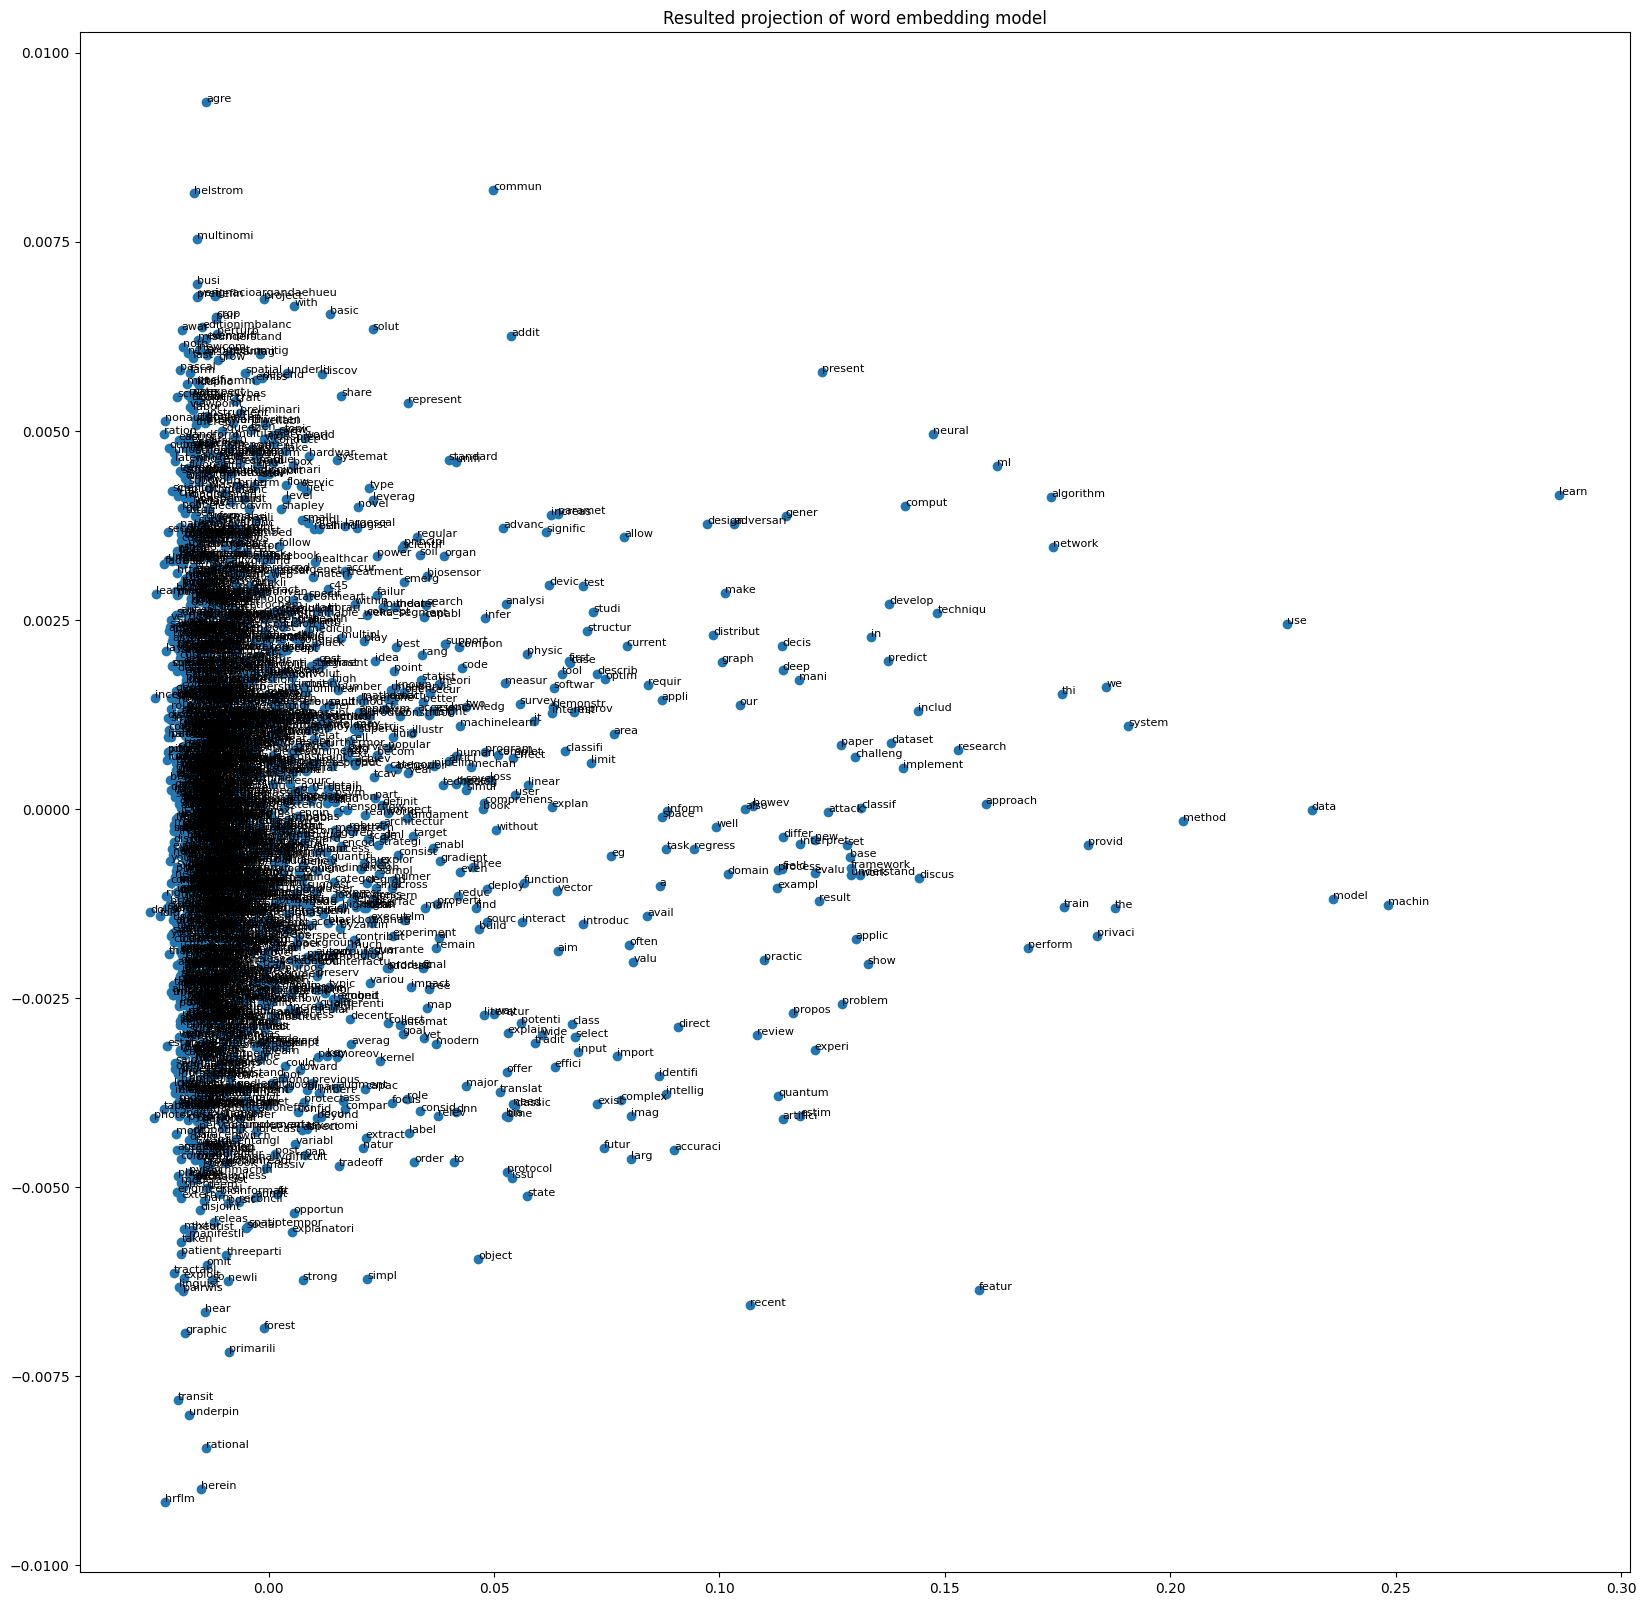

In [40]:
#Question-3: (2) Visualize the word embedding model you created.
plt.figure(figsize=(20, 20))

# Plotting resulted projection
plt.scatter(result[:, 0], result[:, 1])

#code for labeling points
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]),fontsize=8)
plt.title('Resulted projection of word embedding model')
plt.show()

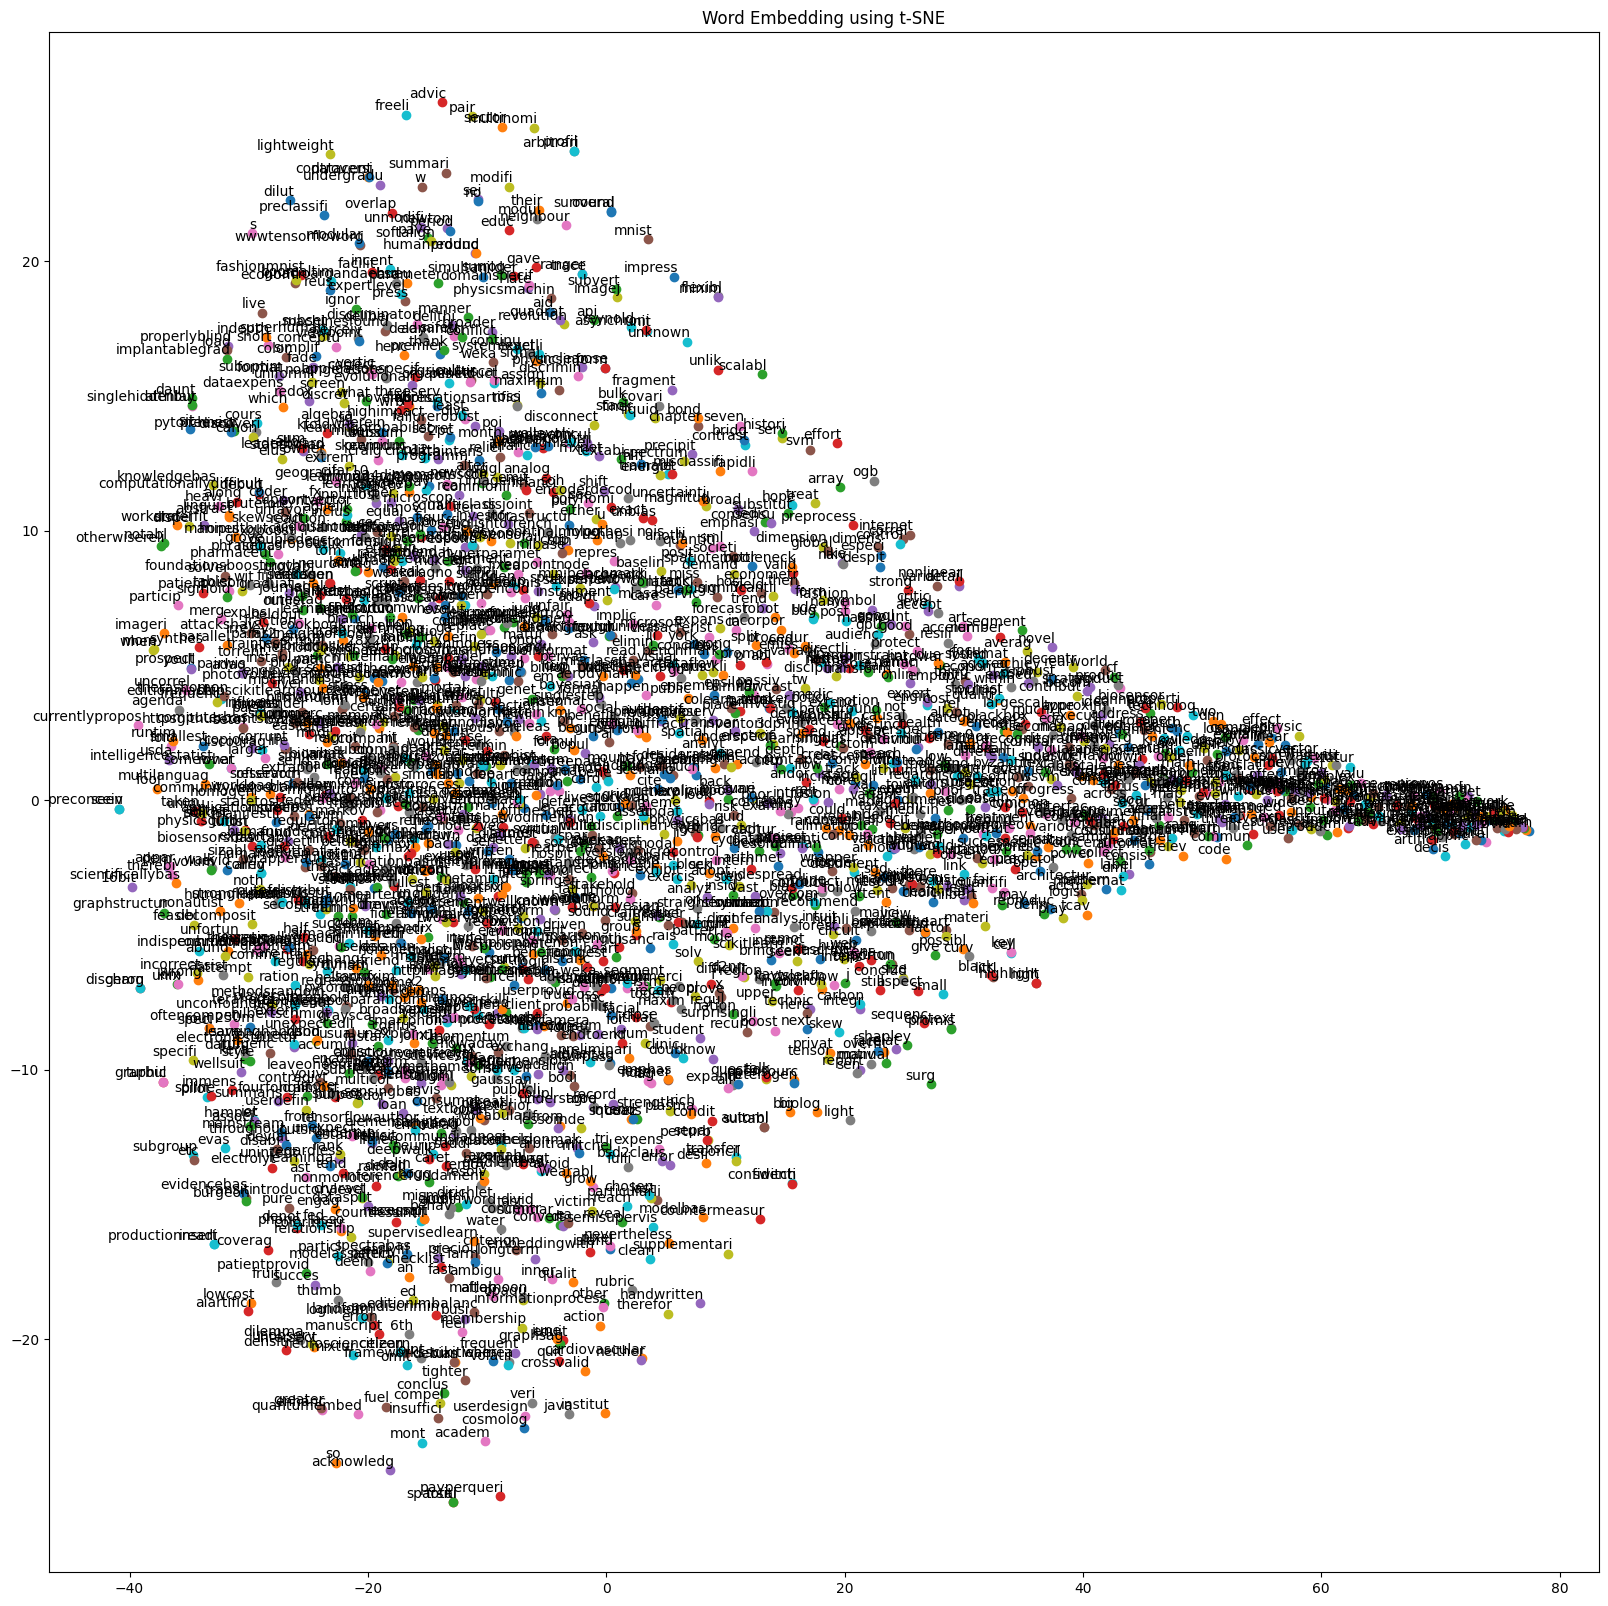

In [41]:
# Visualize the Word Embedding using t-SNE
def tsne_plot_we(model):
    labels = []
    tokens = []
    #creating tokens and labels
    for word in model.wv.key_to_index:
        tokens.append(model.wv[word])
        labels.append(word)

    #initializing model
    tsne_model_we = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    #fitting the model
    new_val = tsne_model_we.fit_transform(pd.DataFrame(tokens))

    x = []
    y = []
    for value in new_val:
        x.append(value[0])
        y.append(value[1])
  #plotting
    plt.figure(figsize=(20, 20))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(3, 1),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title('Word Embedding using t-SNE')
    plt.show()

# Visualize the Word Embedding
tsne_plot_we(model)

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [42]:
# The GitHub link of your final csv file

# Link: https://github.com/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/Cherukupally_Abstract_Sentiments.csv



https://github.com/ManasaCherukupally1/Manasa_INFO5731_Spring2023/blob/main/Cherukupally_Abstract_Sentiments.csv